In [3]:
import numpy as np
import pandas as pd


In [2]:
data= pd.read_csv('Z:\y21cs174\Data Analysis Lab\pizza_price_prediction_5thquestion.csv')
data

,company,price_cad,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,$29,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,$25,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,$19,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,$22,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,$30,18 inch,mozzarella,double_signature,jumbo,yes,no,yes
...,...,...,...,...,...,...,...,...,...
124,E,$11,8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,$14,12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,$17,14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,$12,8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes


In [4]:
count_null = data.isnull().sum().sum()
count_null

0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_cad        129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


# b)	Calculate average price of pizza prepared by each company.

In [6]:
data['price'] = [int(i[1:]) for i in data['price_cad']] # for removing $ symbol from price
data.groupby('company')['price'].mean()

company
A    19.600
B    14.375
C    13.800
D    16.600
E    14.400
Name: price, dtype: float64

# c)	Find the companies, who prepared pizzas with different variants with same diameter.

In [7]:
data.groupby(['company','diameter']).filter(lambda x : x['variant'].nunique()>1)
# group by each company and diameter ,filtering the 

,company,price_cad,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price
0,A,$29,22 inch,chicken,double_signature,jumbo,yes,yes,no,29
2,A,$19,16 inch,mushrooms,double_signature,reguler,yes,yes,yes,19
3,A,$22,14 inch,smoked_beef,double_signature,reguler,yes,no,yes,22
5,A,$20,18.5 inch,black_papper,american_favorite,jumbo,no,no,yes,20
6,A,$18,16 inch,smoked_beef,american_favorite,jumbo,no,yes,yes,18
...,...,...,...,...,...,...,...,...,...,...
124,E,$11,8.5 inch,tuna,spicy tuna,small,yes,yes,yes,11
125,E,$14,12 inch,tuna,spicy tuna,medium,yes,yes,yes,14
126,E,$17,14 inch,tuna,spicy tuna,large,yes,yes,yes,17
127,E,$12,8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes,12


# d)	Which company has more pizzas? Show the result with graph.

Matplotlib is building the font cache; this may take a moment.


Text(0.5, 1.0, 'company vs no.of pizzas')

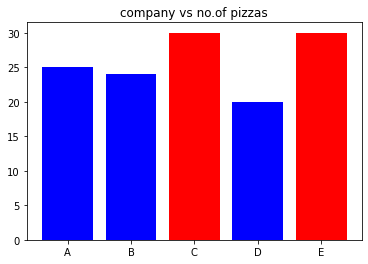

In [8]:
import matplotlib.pyplot as plt
d1=data.groupby('company')['variant'].count()
maxi= d1.max()
graph=['red' if i==maxi else 'blue' for i in d1]
plt.bar(d1.index,d1,color=graph)
plt.title("company vs no.of pizzas")

# e)	Check whether the pizza data set contains null value or not. /Count the no. of null values in the pizza dataset./ Find the number of missing data points per column.

In [10]:
data.isnull().sum()

company            0
price_cad          0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
price              0
dtype: int64

# f)Rename the column price_cad as price.

In [11]:
data.rename(columns={'price':'price_cad','price_cad':'price'},inplace=True)


In [20]:
data.head(15)

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price_cad,diamet
0,A,$29,22 inch,chicken,double_signature,jumbo,yes,yes,no,29,22.0
1,A,$25,20 inch,papperoni,double_signature,jumbo,yes,yes,no,25,20.0
2,A,$19,16 inch,mushrooms,double_signature,reguler,yes,yes,yes,19,16.0
3,A,$22,14 inch,smoked_beef,double_signature,reguler,yes,no,yes,22,14.0
4,A,$30,18 inch,mozzarella,double_signature,jumbo,yes,no,yes,30,18.0
5,A,$20,18.5 inch,black_papper,american_favorite,jumbo,no,no,yes,20,18.5
6,A,$18,16 inch,smoked_beef,american_favorite,jumbo,no,yes,yes,18,16.0
7,A,$14,8 inch,papperoni,american_favorite,reguler,no,no,yes,14,8.0
8,A,$16,12 inch,mushrooms,american_favorite,reguler,yes,no,yes,16,12.0
9,A,$16,12 inch,smoked_beef,american_favorite,reguler,no,no,no,16,12.0


# g)	Identify the number of companies in each category 

In [12]:
data.groupby('variant')['company'].unique()

variant
BBQ_meat_fiesta         [C, E]
BBQ_sausage                [C]
american_classic           [C]
american_favorite          [A]
classic              [B, D, E]
crunchy              [B, D, E]
double_decker        [B, D, E]
double_mix              [A, D]
double_signature           [A]
extravaganza               [C]
gournet_greek              [C]
italian_veggie             [C]
meat_eater                 [C]
meat_lovers             [A, D]
neptune_tuna               [C]
new_york             [B, D, E]
spicy tuna                 [E]
spicy_tuna                 [C]
super_supreme              [A]
thai_veggie                [C]
Name: company, dtype: object

# h)	Identify which type of pizza is more expensive.

In [13]:
data[data['price']==max(data['price'])]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price_cad
4,A,$30,18 inch,mozzarella,double_signature,jumbo,yes,no,yes,30


# i)	Find diameter of each jumbo size pizza.

In [14]:
data[data['size']=='jumbo']['diameter']


0       22 inch
1       20 inch
4       18 inch
5     18.5 inch
6       16 inch
10    18.5 inch
11      16 inch
15    18.5 inch
16      16 inch
20      22 inch
21    18.5 inch
79    18.5 inch
80      16 inch
84      22 inch
85    18.5 inch
Name: diameter, dtype: object

# j)	Any jumbo pizza with diameter less than 16 exists, remove such rows.

In [15]:
data['diamet']= [float(i[:-5]) for i in data['diameter']]   # for removing ' inch' from the end of the diameter column
filter_data=data[data['diamet']<16.0].index                 # index of such rows <16.0
data.drop(filter_data)


,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price_cad,diamet
0,A,$29,22 inch,chicken,double_signature,jumbo,yes,yes,no,29,22.0
1,A,$25,20 inch,papperoni,double_signature,jumbo,yes,yes,no,25,20.0
2,A,$19,16 inch,mushrooms,double_signature,reguler,yes,yes,yes,19,16.0
4,A,$30,18 inch,mozzarella,double_signature,jumbo,yes,no,yes,30,18.0
5,A,$20,18.5 inch,black_papper,american_favorite,jumbo,no,no,yes,20,18.5
6,A,$18,16 inch,smoked_beef,american_favorite,jumbo,no,yes,yes,18,16.0
10,A,$20,18.5 inch,mozzarella,super_supreme,jumbo,no,no,no,20,18.5
11,A,$18,16 inch,black_papper,super_supreme,jumbo,yes,yes,no,18,16.0
15,A,$20,18.5 inch,mozzarella,meat_lovers,jumbo,no,yes,yes,20,18.5
16,A,$18,16 inch,smoked_beef,meat_lovers,jumbo,no,yes,yes,18,16.0


# k)	Calculate average price of a pizza prepared by company A.

In [16]:
data[data['company']== 'A']['price_cad'].mean()

19.6

# l)	Find the mean of the diameter and average price of pizzas prepared by company C.

In [17]:
print(data[data['company']=='C']['diamet'].mean())

11.5


In [18]:
print(data[data['company']=='C']['price_cad'].mean())

13.8


# m)	Find the companies, who prepared pizzas with different variants with same diameter.

In [19]:
data.groupby(['company','diamet']).filter(lambda x: x['variant'].nunique()>1)['company']

0      A
2      A
3      A
5      A
6      A
      ..
124    E
125    E
126    E
127    E
128    E
Name: company, Length: 100, dtype: object

# n)	Find the pizza variant with extra_mushrooms and topping with chicken.

# o)	What is the most expensive pizza in each company?


In [43]:
data.groupby(['company'])['price'].max()

company
A    $30 
B    $19 
C    $17 
D    $28 
E    $19 
Name: price, dtype: object

# p)	Which company has more pizzas on the menu? Show the result with graph.

# q)	What is the average price of pizza in each company?

In [42]:
import pandas as pd
a=data.groupby(['company'])['price_cad'].mean()
b=data.groupby(['company'])['diamet'].mean()

print(a)


company
A    19.600
B    14.375
C    13.800
D    16.600
E    14.400
Name: price_cad, dtype: float64
